<a href="https://colab.research.google.com/github/Santosh311/Wind-Power-Forecasting/blob/main/green_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Reading the Data

In [ ]:
df = pd.read_csv('/content/Turbine_Data.csv')
df

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

##Rename Unnamed:0 to Date-time for Convenience

In [ ]:
df['Date-time'] = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             93817 non-null   float64
 2   BearingShaftTemperature       62518 non-null   float64
 3   Blade1PitchAngle              41996 non-null   float64
 4   Blade2PitchAngle              41891 non-null   float64
 5   Blade3PitchAngle              41891 non-null   float64
 6   ControlBoxTemperature         62160 non-null   float64
 7   GearboxBearingTemperature     62540 non-null   float64
 8   GearboxOilTemperature         62438 non-null   float64
 9   GeneratorRPM                  62295 non-null   float64
 10  GeneratorWinding1Temperature  62427 non-null   float64
 11  GeneratorWinding2Temperature  62449 non-null   float64
 12  HubTemperature                62406 non-null

In [ ]:
df["Date-time"] = df["Date-time"].apply(lambda x : datetime.strptime(x[:19],'%Y-%m-%d %H:%M:%S'))
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


##Value Counts

In [ ]:
drop_list = []
for i in df.columns:
    print(i,len(df[i].value_counts()))
    if len(df[i].value_counts()) == 1:
        drop_list.append(i)
df = df.drop(drop_list,axis = 1)

ActivePower 94084
AmbientTemperatue 93677
BearingShaftTemperature 62286
Blade1PitchAngle 38957
Blade2PitchAngle 39018
Blade3PitchAngle 39018
ControlBoxTemperature 1
GearboxBearingTemperature 62313
GearboxOilTemperature 62412
GeneratorRPM 61067
GeneratorWinding1Temperature 62406
GeneratorWinding2Temperature 62424
HubTemperature 38119
MainBoxTemperature 49146
NacellePosition 6664
ReactivePower 94040
RotorRPM 59260
TurbineStatus 353
WTG 1
WindDirection 6664
WindSpeed 94225
Date-time 118224


In [ ]:
df = df.dropna()

#Correaltion HeatMap

In [ ]:
df_corr = df.corr()
df_corr

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
ActivePower,1.000000,0.060806,0.698464,-0.389111,-0.387845,-0.387845,0.827934,0.799299,0.843537,0.932307,0.933407,0.409144,0.165881,0.371705,0.977424,0.842538,0.000346,0.371705,0.934391
AmbientTemperatue,0.060806,1.000000,0.303121,0.087401,0.087458,0.087458,0.129196,0.263704,-0.026827,0.188597,0.189542,0.655865,0.841905,0.056618,0.041992,-0.025449,-0.007190,0.056618,0.019487
BearingShaftTemperature,0.698464,0.303121,1.000000,-0.492628,-0.491859,-0.491859,0.880558,0.799778,0.685880,0.789217,0.788177,0.784844,0.407087,0.259748,0.677930,0.686008,-0.000574,0.259748,0.626526
Blade1PitchAngle,-0.389111,0.087401,-0.492628,1.000000,0.997789,0.997789,-0.633866,-0.579849,-0.783989,-0.397932,-0.393920,-0.187112,0.204316,-0.062072,-0.402141,-0.784969,-0.001177,-0.062072,-0.426758
Blade2PitchAngle,-0.387845,0.087458,-0.491859,0.997789,1.000000,1.000000,-0.632584,-0.578910,-0.782158,-0.396591,-0.392593,-0.186183,0.204861,-0.061489,-0.400802,-0.783163,-0.001156,-0.061489,-0.425151
Blade3PitchAngle,-0.387845,0.087458,-0.491859,0.997789,1.000000,1.000000,-0.632584,-0.578910,-0.782158,-0.396591,-0.392593,-0.186183,0.204861,-0.061489,-0.400802,-0.783163,-0.001156,-0.061489,-0.425151
GearboxBearingTemperature,0.827934,0.129196,0.880558,-0.633866,-0.632584,-0.632584,1.000000,0.921256,0.863245,0.864776,0.862988,0.566941,0.217851,0.303206,0.821803,0.863150,-0.002334,0.303206,0.807185
GearboxOilTemperature,0.799299,0.263704,0.799778,-0.579849,-0.578910,-0.578910,0.921256,1.000000,0.802338,0.896723,0.894768,0.557546,0.210927,0.367586,0.796136,0.802289,-0.004406,0.367586,0.775364
GeneratorRPM,0.843537,-0.026827,0.685880,-0.783989,-0.782158,-0.782158,0.863245,0.802338,1.000000,0.802369,0.800677,0.343587,-0.012822,0.268390,0.840485,0.999759,0.002279,0.268390,0.843996
GeneratorWinding1Temperature,0.932307,0.188597,0.789217,-0.397932,-0.396591,-0.396591,0.864776,0.896723,0.802369,1.000000,0.999961,0.542563,0.258645,0.402353,0.918764,0.801846,-0.000174,0.402353,0.894967


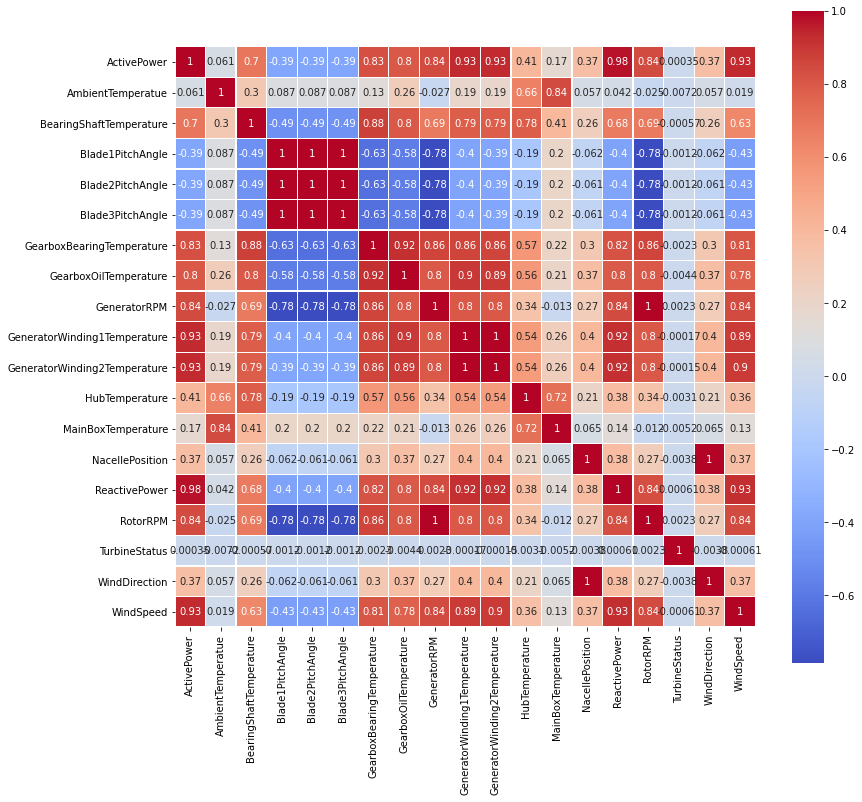

In [ ]:
plt.figure(figsize=(13,12))
sns.heatmap(df.corr(),square=True,annot=True,linewidths=0.2,cmap="coolwarm")
plt.show()

#Generation of Wind Power on Time Series Data

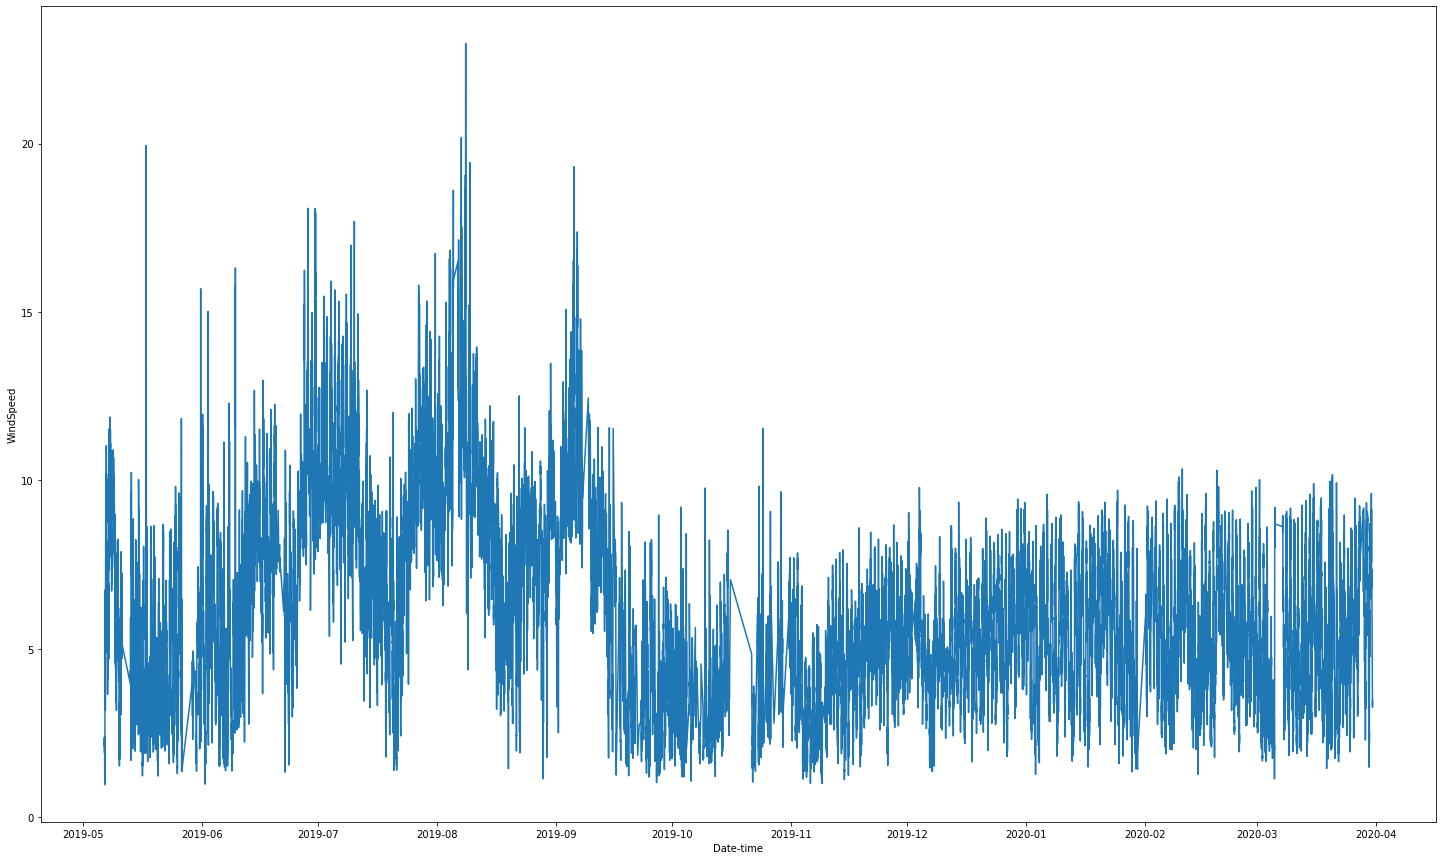

In [ ]:
plt.figure(figsize=(25,15))
sns.lineplot(x='Date-time',y='WindSpeed', data=df[['Date-time','WindSpeed']])
plt.show()

#Applying Feature Scaling to the Dataset

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

rs = RobustScaler()
columns = df.columns.values.tolist()
columns.remove('Date-time')

preprocessed = rs.fit_transform(df[columns])
preprocessed = pd.DataFrame(preprocessed,columns=columns)

preprocessed['Time'] = pd.to_datetime(df['Date-time'].astype(str).values.tolist())

preprocessed.dtypes

ActivePower                            float64
AmbientTemperatue                      float64
BearingShaftTemperature                float64
Blade1PitchAngle                       float64
Blade2PitchAngle                       float64
Blade3PitchAngle                       float64
GearboxBearingTemperature              float64
GearboxOilTemperature                  float64
GeneratorRPM                           float64
GeneratorWinding1Temperature           float64
GeneratorWinding2Temperature           float64
HubTemperature                         float64
MainBoxTemperature                     float64
NacellePosition                        float64
ReactivePower                          float64
RotorRPM                               float64
TurbineStatus                          float64
WindDirection                          float64
WindSpeed                              float64
Time                            datetime64[ns]
dtype: object

In [ ]:
preprocessed.shape

(32818, 20)

#Splitting into Training & Testing Datasets

In [ ]:
from sklearn.model_selection import train_test_split

column_list = ['Time','ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus','WindDirection']
x = preprocessed[column_list]

y = preprocessed['WindSpeed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
print(x_train.shape)
print(x_test.shape)

(19690, 19)
(13128, 19)


### Metric Evaluation Functions

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt

def eval_metrics(test_y, predict_y):
  accuracy = accuracy_score(test_y.astype('int'),predict_y.astype('int'))*100
  mse = mean_squared_error(test_y.astype('int'), predict_y.astype('int'))*100
  rmse = sqrt(mse)
  return({'Accuracy' : accuracy, 'RMSE' : rmse, 'MSE' : mse})

In [ ]:
sc = StandardScaler()
sc.fit(x_train.astype('int'))
x_train = sc.fit_transform(x_train.astype('int'), y_train.astype('int'))
sc.fit(x_test.astype('int'))
x_test = sc.fit_transform(x_test.astype('int'), y_test.astype('int'))

## Applying Linear Regression

### Training Phase

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs = 100, normalize=True)

lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)

eval_metrics(y_train, y_pred_train)

{'Accuracy': 89.19756221432199,
 'MSE': 11.797866937531742,
 'RMSE': 3.434802314185162}

### Testing Phase

In [ ]:
lr = LinearRegression(n_jobs = 100, normalize=True)

lr.fit(x_test, y_test)
y_pred_test = lr.predict(x_test)

eval_metrics(y_test, y_pred_test)

{'Accuracy': 89.34338817794027,
 'MSE': 11.075563680682512,
 'RMSE': 3.3279969472165254}

## Applying KNN

### Training Phase

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(x_train.astype('int'), y_train.astype('int'))

y_pred_train = knn.predict(x_train.astype('int'))

eval_metrics(y_train, y_pred_train)

{'Accuracy': 91.45251396648044,
 'MSE': 10.208227526663281,
 'RMSE': 3.1950316941563006}

### Testing Phase

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(x_test.astype('int'), y_test.astype('int'))

y_pred_test = knn.predict(x_test.astype('int'))

eval_metrics(y_test, y_pred_test)

{'Accuracy': 92.33698964046313,
 'MSE': 8.089579524680072,
 'RMSE': 2.844218614080161}

## Applying SVM

### Training Phase

In [ ]:
from sklearn.svm import SVR

classifier = SVR(kernel = 'rbf')
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)

eval_metrics(y_train, y_pred_train)

{'Accuracy': 93.47384459116303,
 'MSE': 6.749619095987811,
 'RMSE': 2.598002905307808}

### Testing Phase

In [ ]:
classifier = SVR(kernel = 'rbf')
classifier.fit(x_test, y_test)

y_pred_test = classifier.predict(x_test)

eval_metrics(y_test, y_pred_test)

{'Accuracy': 93.60146252285192,
 'MSE': 6.444241316270567,
 'RMSE': 2.5385510269188143}

### SVM Actual vs Predicted

In [ ]:
svm_actual = y_test
svm_pred = y_pred_test

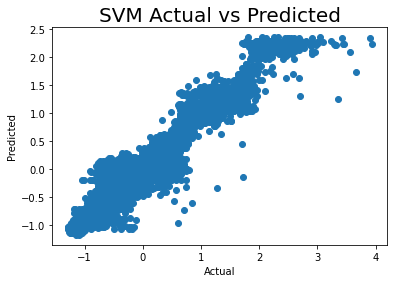

In [ ]:
plt.scatter(svm_actual, svm_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVM Actual vs Predicted", fontsize=20)
plt.show()